# 打造87%的RNN
#### 更改文字壓縮維度、LSTM神經元個數、增加不同dropout、降低訓練次數

## 1.初始準備

### 1.1讀入基本套件

In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### 1.2 讀入 IMDB 電影數據庫

In [4]:
from keras.datasets import imdb

Using TensorFlow backend.


In [73]:
(x_train0, y_train), (x_test0, y_test) = imdb.load_data(num_words=10000)

### 1.3 調整輸入長度一致(150個字)

In [6]:
from keras.preprocessing import sequence

In [7]:
x_train = sequence.pad_sequences(x_train0, maxlen=150)
x_test = sequence.pad_sequences(x_test0, maxlen=150)

In [8]:
x_train.shape

(25000, 150)

## 2.打造CNN

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

### 2.1 Model_0(上課的設定)
- 文字要壓到 3 維
- LSTM 有 4 個神經元
- activation function指定sigmoid

In [14]:
N0 = 3 # 文字要壓到 N 維
K0 = 4 # LSTM 有 K 個神經元

In [19]:
model_0 = Sequential()
model_0.add(Embedding(10000, N0))
model_0.add(LSTM(K0))
model_0.add(Dense(1, activation='sigmoid'))

In [20]:
model_0.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [21]:
model_0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 3)           30000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 4)                 128       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 30,133
Trainable params: 30,133
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_0_result = model_0.fit(x_train, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 53s 2ms/step - loss: 0.5155 - acc: 0.7423 - val_loss: 0.3758 - val_acc: 0.8436
Epoch 2/5
25000/25000 [==============================] - 54s 2ms/step - loss: 0.2911 - acc: 0.8874 - val_loss: 0.3305 - val_acc: 0.8618
Epoch 3/5
25000/25000 [==============================] - 54s 2ms/step - loss: 0.2241 - acc: 0.9198 - val_loss: 0.3413 - val_acc: 0.8627
Epoch 4/5
25000/25000 [==============================] - 61s 2ms/step - loss: 0.1847 - acc: 0.9386 - val_loss: 0.3829 - val_acc: 0.8527
Epoch 5/5
25000/25000 [==============================] - 58s 2ms/step - loss: 0.1605 - acc: 0.9466 - val_loss: 0.4166 - val_acc: 0.8484


### 2.1.1 model_0結果：正確率為0.85

In [23]:
score = model_0.evaluate(x_test, y_test)

25000/25000 [==============================] - 7s 293us/step


In [24]:
print(f'測試資料的 loss = {score[0]}')
print(f'測試資正確率 = {score[1]}')

測試資料的 loss = 0.4165778584384918
測試資正確率 = 0.84844


### 2.2 Model_1(先增加N跟K)
- 文字要壓到 <span style="color:red;">80</span> 維
- LSTM 有 <span style="color:red;">10</span> 個神經元
- activation function指定sigmoid

In [45]:
N1 = 80 # 文字要壓到 N 維
K1 = 10 # LSTM 有 K 個神經元

In [46]:
model_1 = Sequential()
model_1.add(Embedding(10000, N1))
model_1.add(LSTM(K1))
model_1.add(Dense(1, activation='sigmoid'))

In [47]:
model_1.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [48]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 80)          800000    
_________________________________________________________________
lstm_8 (LSTM)                (None, 10)                3640      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [49]:
model_1_result = model_1.fit(x_train, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.4475 - acc: 0.7892 - val_loss: 0.3374 - val_acc: 0.8579
Epoch 2/5
25000/25000 [==============================] - 69s 3ms/step - loss: 0.2578 - acc: 0.8994 - val_loss: 0.3460 - val_acc: 0.8564
Epoch 3/5
25000/25000 [==============================] - 66s 3ms/step - loss: 0.1806 - acc: 0.9354 - val_loss: 0.4173 - val_acc: 0.8532
Epoch 4/5
25000/25000 [==============================] - 63s 3ms/step - loss: 0.1410 - acc: 0.9506 - val_loss: 0.4321 - val_acc: 0.8510
Epoch 5/5
25000/25000 [==============================] - 65s 3ms/step - loss: 0.1091 - acc: 0.9619 - val_loss: 0.4148 - val_acc: 0.8600


In [50]:
score_1 = model_1.evaluate(x_test, y_test)

25000/25000 [==============================] - 9s 375us/step


### 2.2.1model_1結果：正確率為0.86，些微上升

In [51]:
print(f'測試資料的 loss = {score_1[0]}')
print(f'測試資正確率 = {score_1[1]}')

測試資料的 loss = 0.4148408073139191
測試資正確率 = 0.85996


### 2.3model_2 加入dropout，解決overfitting的問題
- 文字要壓到 80 維
- LSTM 有 10 個神經元
- activation function指定sigmoid
- <span style="color:red;">加入dropout(0.5)</span>

In [55]:
from keras.layers import Dropout

In [56]:
N2 = 80 # 文字要壓到 N 維
K2 = 10 # LSTM 有 K 個神經元
D1 = 0.5 # dropout比例
D2 = 0.5 # dropout比例

In [60]:
model_2 = Sequential()
model_2.add(Embedding(10000, N2))
model_2.add(Dropout(D1))
model_2.add(LSTM(K2))
model_2.add(Dropout(D2))
model_2.add(Dense(1, activation='sigmoid'))

In [61]:
model_2.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [62]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 80)          800000    
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 10)                3640      
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_2_result = model_2.fit(x_train, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 75s 3ms/step - loss: 0.4717 - acc: 0.7823 - val_loss: 0.3404 - val_acc: 0.8570
Epoch 2/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.2948 - acc: 0.8916 - val_loss: 0.3318 - val_acc: 0.8565
Epoch 3/5
25000/25000 [==============================] - 71s 3ms/step - loss: 0.2335 - acc: 0.9186 - val_loss: 0.3717 - val_acc: 0.8606
Epoch 4/5
25000/25000 [==============================] - 72s 3ms/step - loss: 0.1954 - acc: 0.9322 - val_loss: 0.4067 - val_acc: 0.8502
Epoch 5/5
25000/25000 [==============================] - 73s 3ms/step - loss: 0.1723 - acc: 0.9412 - val_loss: 0.3800 - val_acc: 0.8616


In [64]:
score_2 = model_2.evaluate(x_test, y_test)

25000/25000 [==============================] - 18s 730us/step


In [65]:
print(f'測試資料的 loss = {score_2[0]}')
print(f'測試資正確率 = {score_2[1]}')

測試資料的 loss = 0.37998341552257536
測試資正確率 = 0.86164


###  2.3.1 model_2結論：正確率為0.86，有稍微再上升，但沒有達到0.87

### 2.4 model_3 更改dropout的數值，調小一點
- 文字要壓到 80 維
- LSTM 有 10 個神經元
- activation function指定sigmoid
- 加入dropout(<span style="color:red;">0.2</span>)

In [66]:
N3 = 80 # 文字要壓到 N 維
K3 = 10 # LSTM 有 K 個神經元
D1 = 0.2 # dropout比例
D2 = 0.2 # dropout比例

In [67]:
model_3 = Sequential()
model_3.add(Embedding(10000, N3))
model_3.add(Dropout(D1))
model_3.add(LSTM(K3))
model_3.add(Dropout(D2))
model_3.add(Dense(1, activation='sigmoid'))

In [68]:
model_3.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [69]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, None, 80)          800000    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 10)                3640      
_________________________________________________________________
dropout_6 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [70]:
model_3_result = model_3.fit(x_train, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 132s 5ms/step - loss: 0.4780 - acc: 0.7781 - val_loss: 0.3727 - val_acc: 0.8447
Epoch 2/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.2991 - acc: 0.8823 - val_loss: 0.3294 - val_acc: 0.8605
Epoch 3/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.2231 - acc: 0.9186 - val_loss: 0.3435 - val_acc: 0.8618
Epoch 4/5
25000/25000 [==============================] - 127s 5ms/step - loss: 0.1792 - acc: 0.9377 - val_loss: 0.3602 - val_acc: 0.8567
Epoch 5/5
25000/25000 [==============================] - 127s 5ms/step - loss: 0.1437 - acc: 0.9508 - val_loss: 0.4190 - val_acc: 0.8558


In [71]:
score_3 = model_3.evaluate(x_test, y_test)

25000/25000 [==============================] - 18s 737us/step


In [72]:
print(f'測試資料的 loss = {score_3[0]}')
print(f'測試資正確率 = {score_3[1]}')

測試資料的 loss = 0.4189763802242279
測試資正確率 = 0.8558


### 2.4.1 model_3結論：正確率為0.85，不升反降QQ

### 2.5 model_4 增加maxlen
- 文字要壓到 80 維
- LSTM 有 10 個神經元
- activation function指定sigmoid
- 加入dropout(0.2)
- maxlen從150改為<span style="color:red;">250</span>

In [74]:
x_train1 = sequence.pad_sequences(x_train0, maxlen=250)
x_test1 = sequence.pad_sequences(x_test0, maxlen=250)

In [75]:
N4 = 80 # 文字要壓到 N 維
K4 = 10 # LSTM 有 K 個神經元
D1 = 0.2 # dropout比例
D2 = 0.2 # dropout比例

In [76]:
model_4 = Sequential()
model_4.add(Embedding(10000, N4))
model_4.add(Dropout(D1))
model_4.add(LSTM(K4))
model_4.add(Dropout(D2))
model_4.add(Dense(1, activation='sigmoid'))

In [78]:
model_4.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [79]:
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 80)          800000    
_________________________________________________________________
dropout_7 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 10)                3640      
_________________________________________________________________
dropout_8 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [80]:
model_4_result = model_4.fit(x_train1, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test1, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 197s 8ms/step - loss: 0.4781 - acc: 0.7800 - val_loss: 0.3695 - val_acc: 0.8444
Epoch 2/5
25000/25000 [==============================] - 191s 8ms/step - loss: 0.2868 - acc: 0.8867 - val_loss: 0.3288 - val_acc: 0.8551
Epoch 3/5
25000/25000 [==============================] - 187s 7ms/step - loss: 0.2102 - acc: 0.9245 - val_loss: 0.3384 - val_acc: 0.8610
Epoch 4/5
25000/25000 [==============================] - 191s 8ms/step - loss: 0.1625 - acc: 0.9426 - val_loss: 0.3535 - val_acc: 0.8675
Epoch 5/5
25000/25000 [==============================] - 193s 8ms/step - loss: 0.1285 - acc: 0.9544 - val_loss: 0.4090 - val_acc: 0.8595


In [81]:
score_4 = model_4.evaluate(x_test1, y_test)

25000/25000 [==============================] - 29s 1ms/step


In [82]:
print(f'測試資料的 loss = {score_4[0]}')
print(f'測試資正確率 = {score_4[1]}')

測試資料的 loss = 0.4090455540084839
測試資正確率 = 0.85948


### 2.5.1 model_4結論：正確率為0.85，還是無法增加正確率

### 2.6 model_5 dropout調回0.5試試
- 文字要壓到 80 維
- LSTM 有 10 個神經元
- activation function指定sigmoid
- 加入dropout(<span style="color:red;">0.5</span>)
- maxlen 250

In [86]:
N5 = 80 # 文字要壓到 N 維
K5 = 10 # LSTM 有 K 個神經元
D1 = 0.5 # dropout比例
D2 = 0.5 # dropout比例

In [87]:
model_5 = Sequential()
model_5.add(Embedding(10000, N5))
model_5.add(Dropout(D1))
model_5.add(LSTM(K5))
model_5.add(Dropout(D2))
model_5.add(Dense(1, activation='sigmoid'))

In [88]:
model_5.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [89]:
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, None, 80)          800000    
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 10)                3640      
_________________________________________________________________
dropout_10 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [90]:
model_5_result = model_5.fit(x_train1, y_train,
                          batch_size = 32,
                          epochs = 5,
                          validation_data = (x_test1, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 204s 8ms/step - loss: 0.5213 - acc: 0.7525 - val_loss: 0.3666 - val_acc: 0.8453
Epoch 2/5
25000/25000 [==============================] - 190s 8ms/step - loss: 0.3126 - acc: 0.8820 - val_loss: 0.3126 - val_acc: 0.8712
Epoch 3/5
25000/25000 [==============================] - 190s 8ms/step - loss: 0.2453 - acc: 0.9131 - val_loss: 0.3575 - val_acc: 0.8683
Epoch 4/5
25000/25000 [==============================] - 189s 8ms/step - loss: 0.2089 - acc: 0.9250 - val_loss: 0.3506 - val_acc: 0.8697
Epoch 5/5
25000/25000 [==============================] - 187s 7ms/step - loss: 0.1817 - acc: 0.9390 - val_loss: 0.3869 - val_acc: 0.8657


In [91]:
score_5 = model_5.evaluate(x_test1, y_test)
print(f'測試資料的 loss = {score_5[0]}')
print(f'測試資正確率 = {score_5[1]}')

25000/25000 [==============================] - 26s 1ms/step
測試資料的 loss = 0.38688930970668794
測試資正確率 = 0.86572


### 2.6.1 model_5結論：正確率0.86，有上0.87，但又往下掉，也許不要訓練太多次(overfitting)反而是好的？

### 2.7 model_6 減少epoch，並再提高一點dropout看看
- 文字要壓到 80 維
- LSTM 有 10 個神經元
- activation function指定sigmoid
- 加入dropout(<span style="color:red;">0.6</span>)
- maxlen 250
- 訓練<span style="color:red;">2</span>次

In [93]:
N6 = 80 # 文字要壓到 N 維
K6 = 10 # LSTM 有 K 個神經元
D1 = 0.6 # dropout比例
D2 = 0.6 # dropout比例

In [94]:
model_6 = Sequential()
model_6.add(Embedding(10000, N6))
model_6.add(Dropout(D1))
model_6.add(LSTM(K6))
model_6.add(Dropout(D2))
model_6.add(Dense(1, activation='sigmoid'))

In [95]:
model_6.compile(loss = 'binary_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

In [96]:
model_6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, None, 80)          800000    
_________________________________________________________________
dropout_11 (Dropout)         (None, None, 80)          0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 10)                3640      
_________________________________________________________________
dropout_12 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 803,651
Trainable params: 803,651
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_6_result = model_6.fit(x_train1, y_train,
                          batch_size = 32,
                          epochs = 2,
                          validation_data = (x_test1, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 200s 8ms/step - loss: 0.4865 - acc: 0.7764 - val_loss: 0.3338 - val_acc: 0.8655
Epoch 2/2
25000/25000 [==============================] - 192s 8ms/step - loss: 0.3061 - acc: 0.8941 - val_loss: 0.3165 - val_acc: 0.8719


In [100]:
score_6 = model_6.evaluate(x_test1, y_test)
print(f'測試資料的 loss = {score_6[0]}')
print(f'測試資正確率 = {score_6[1]}')

25000/25000 [==============================] - 29s 1ms/step
測試資料的 loss = 0.316459867811203
測試資正確率 = 0.87188


### 2.7.1 model_6結論：正確率0.87，終於~

#### model_6番外篇

如果再訓練兩次呢？

In [101]:
model_6.fit(x_train1, y_train,
                          batch_size = 32,
                          epochs = 2,
                          validation_data = (x_test1, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 187s 7ms/step - loss: 0.2492 - acc: 0.9173 - val_loss: 0.3322 - val_acc: 0.8777
Epoch 2/2
25000/25000 [==============================] - 187s 7ms/step - loss: 0.2096 - acc: 0.9310 - val_loss: 0.4206 - val_acc: 0.8259


正確率上升又下降，再訓練兩次?

In [103]:
model_6.fit(x_train1, y_train,
                          batch_size = 32,
                          epochs = 2,
                          validation_data = (x_test1, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 186s 7ms/step - loss: 0.1947 - acc: 0.9377 - val_loss: 0.3767 - val_acc: 0.8726
Epoch 2/2
25000/25000 [==============================] - 188s 8ms/step - loss: 0.1725 - acc: 0.9448 - val_loss: 0.3843 - val_acc: 0.8676


正確率還是上升又下降~看來不要訓練多次不一定比較好

## 3.總結論

### 畫個圖看看吧

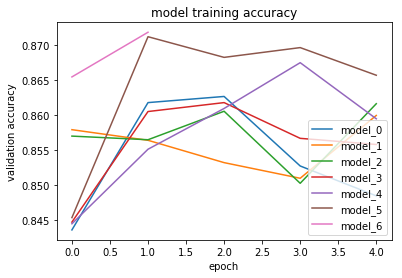

In [108]:
plt.plot(model_0_result.history["val_acc"])
plt.plot(model_1_result.history["val_acc"])
plt.plot(model_2_result.history["val_acc"])
plt.plot(model_3_result.history["val_acc"])
plt.plot(model_4_result.history["val_acc"])
plt.plot(model_5_result.history["val_acc"])
plt.plot(model_6_result.history["val_acc"])

plt.title("model training accuracy")
plt.ylabel("validation accuracy")
plt.xlabel("epoch")
plt.legend(["model_0", "model_1", "model_2", "model_3", "model_4", "model_5", "model_6"], loc = "best")
plt.show()

### 最後雖然有做出正確率達到87%的model，但過程中的嘗試的正確率不停擺盪，因此很難說出哪樣調整一定會比較好，感覺是運氣成分居多哈，不過可以得出的結論是，有時訓練會發生overfitting的狀態，因此不一定model愈訓練會愈好。